### (finito, fit a mano vuol dire disegnare sopra?)

###  1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


In [39]:
import numpy as np
import scipy.stats
import pylab as plt
from tqdm import tqdm 
from scipy.stats import norm

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \frac{1}{\sqrt{2\pi\sigma^2}} \sqrt{2\pi\sigma^2} \frac{2}{2}\,dx = 2\sigma^4  $$

so now $p(x)= 2 \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right)$ and it's integral between 0 and inf is 1 while $f(x)=\frac{1}{2} \sqrt{2\pi\sigma^2} x^3$

We divide by 2 because we compute the absolute value of the distribution, in order to integrate only over the positive x

In [40]:
def f(x, sigma):
    return 0.5* np.sqrt(2*np.pi*sigma**2) * x**3
    
def integral (x, sigma, N):
    return (1/N)* np.sum(f(x, sigma)) 

In [64]:
mu, sigma = 0., 2. # mean and standard deviation
N = np.logspace(1, 7, num=100, base=10)

Show f(x)

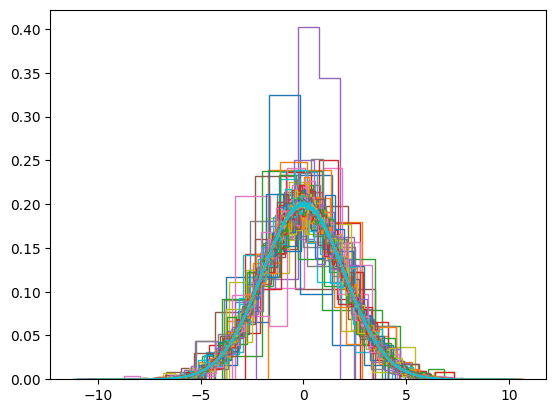

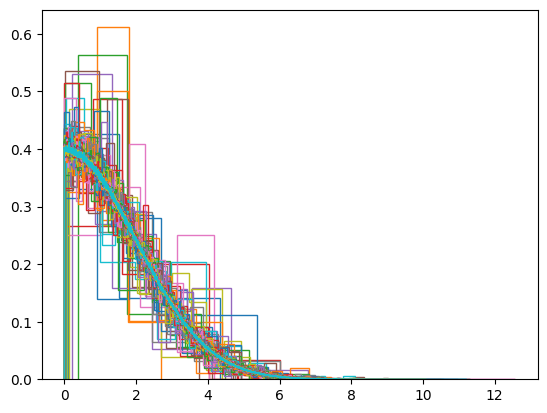

In [67]:
for n in N:
    x_i = np.random.normal(mu, sigma, int(n))
    plt.hist(x_i, bins=int(n**0.5) ,histtype='step', density=True)
plt.show()   

for n in N:
    x_i_abs = np.abs(np.random.normal(mu, sigma, int(n)))
    plt.hist(x_i_abs, bins=int(n**0.5) ,histtype='step', density=True)
plt.show()

### See if the integral converge and how the errors behave

In [68]:
means = []
errors = []
realres = float(2.*sigma**4)
print('Integral results -> 2sigma^2 =', realres)
for n in N:
    x_i_abs = np.abs(np.random.normal(mu, sigma, int(n))) 
    means.append(integral(x_i_abs, sigma, int(n)))
    errors.append((integral(x_i_abs, sigma, int(n))-realres)/realres)
    #print(f'for N = ', int(n), ': integral =', means[-1] , 'error = ', errors[-1])


Integral results -> 2sigma^2 = 32.0


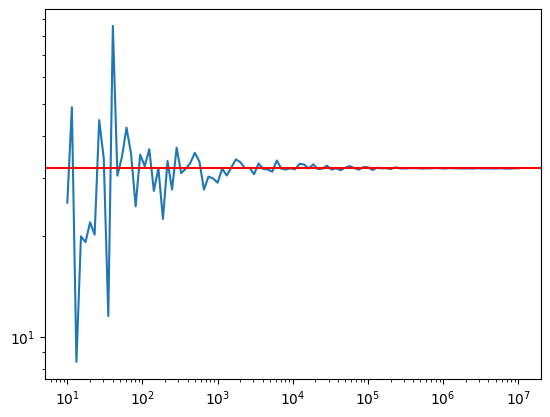

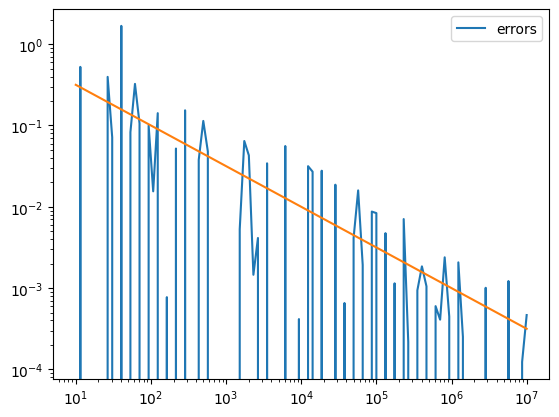

In [69]:
plt.plot(N, means)
plt.axhline(float(2.*sigma**4), color='r')
plt.loglog()
plt.show()

plt.plot(N, errors, label='errors')
plt.plot(N, 1/np.sqrt(N))
plt.loglog()
plt.legend()
plt.show()

## Distribution of the results for every N + fit by hand with $N=10^4$(?)

In [71]:
N = np.logspace(1, 4, num=4, base=10)

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:04<00:00, 2177.95it/s]


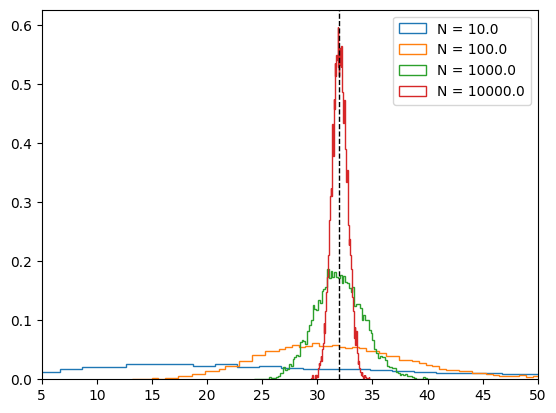

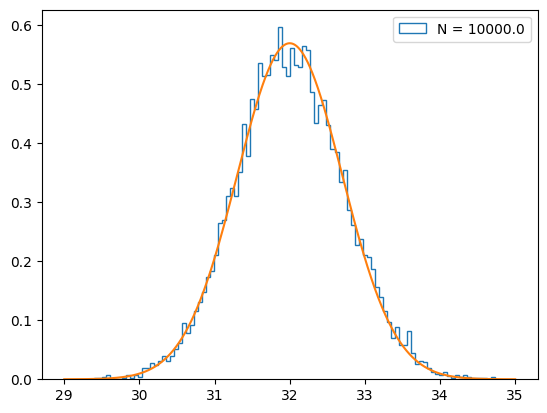

In [72]:

for n in N[:4]:
    results = []
    for x in tqdm(range(0, 10001)):
        x_i_abs = np.abs(np.random.normal(mu, sigma, int(n))) 
        results.append(integral(x_i_abs, sigma, int(n)))
    plt.hist(results, bins=int(x**0.5) ,histtype='step', density=True, label=f'N = {n}')
    
plt.legend()
plt.xlim(5, 50)
plt.axvline(x=32, color='black', linestyle='--', linewidth=1) 
plt.show()

plt.hist(results, bins=int(x**0.5) ,histtype='step', density=True, label=f'N = {n}')
x=np.linspace(29, 35, 10000)
plt.plot(x, norm.pdf(x, 32., 0.7))
plt.legend()
plt.show()